In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd



In [2]:
path="GCB2022v27_MtCO2_flat.csv"
df=pd.read_csv(path)
#TotalEmissionByCountry=df.groupby(["Country", "Year"], as_index=False)[["Total","Coal","Oil","Gas","Cement","Flaring", "Other"]].sum()
#TotalEmissionByCountry.sort_values(by=["Total"], ascending=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [3]:
Top20=(df[(df["Year"]==2021) & (df["Country"]!="Global")].sort_values(by=["Total"], ascending=False)).head(10)
Top20=df[(df["Country"].isin(Top20["Country"]) & (df["Year"]>1990))]
Global=df[(df["Country"]=="Global")& (df["Year"]>1990)]


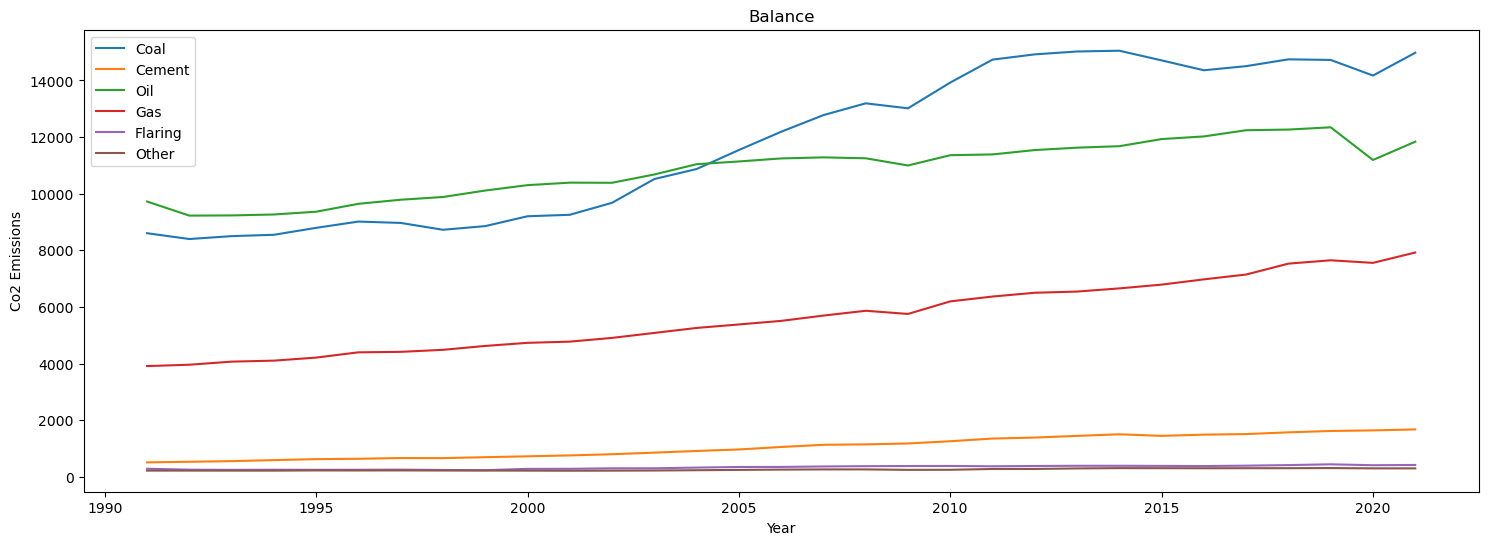

In [4]:
plt.figure(figsize=(18,6))
#plt.plot(Global.Year, Global.Total)
plt.plot(Global.Year, Global.Coal)
plt.plot(Global.Year, Global.Cement)
plt.plot(Global.Year, Global.Oil)
plt.plot(Global.Year, Global.Gas)
plt.plot(Global.Year, Global.Flaring)
plt.plot(Global.Year, Global.Other)
plt.xlabel("Year");
plt.ylabel("Co2 Emissions");
plt.title("Balance");
plt.legend(["Coal", "Cement", "Oil", "Gas", "Flaring", "Other"]);


plt.show()

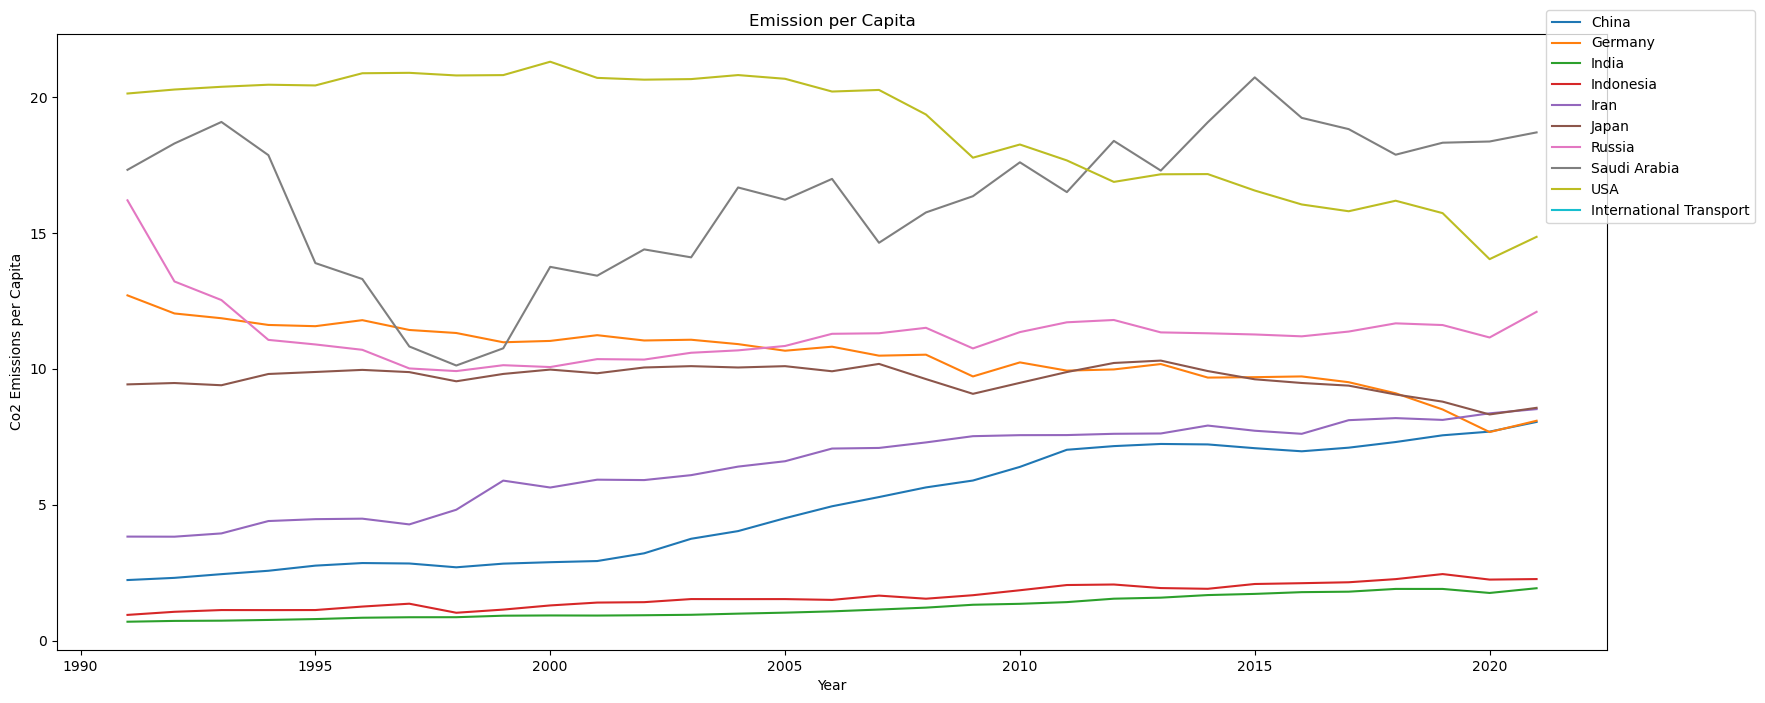

In [5]:
#fig=plt.figure(figsize=(20,8))
#ax=plt.subplot()
fig, ax= plt.subplots(1, figsize=(20,8))
#plt.plot(Global.Year, Global.Total)
for country in Top20["Country"].unique():
    ax.plot(Top20[(Top20["Country"]==country)]["Year"], Top20[(Top20["Country"]==country)]["Per Capita"])

plt.title("Emission per Capita")
plt.xlabel("Year");
plt.ylabel("Co2 Emissions per Capita");
ax.legend((Top20["Country"].unique()),bbox_to_anchor=(1.1, 1.05))




plt.show()

In [6]:
SHAPEFILE = "ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"
geo_df=gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['Country2', 'Country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['Country2'] == 'Antarctica'].index)
df21=df[(df["Year"]==2021)]
Co21=pd.merge(left=geo_df, right=df21, how="left", left_on="Country_code", right_on="ISO 3166-1 alpha-3")
Co21.info()
#merge_df[merge_df["Country2"].isna()]["Country"].unique()
#merged_df.drop(["Country2","Country_code"], axis=1, inplace=True)
#merged_df.dropna(subset=["Geometry"], inplace=True)
#Co21=merged_df[(merged_df["Year"]==2021)]
#Co21.dropna(subset=["Total"], inplace=True)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country2            258 non-null    object  
 1   Country_code        258 non-null    object  
 2   geometry            258 non-null    geometry
 3   Country             212 non-null    object  
 4   ISO 3166-1 alpha-3  212 non-null    object  
 5   Year                212 non-null    float64 
 6   Total               212 non-null    float64 
 7   Coal                210 non-null    float64 
 8   Oil                 210 non-null    float64 
 9   Gas                 210 non-null    float64 
 10  Cement              207 non-null    float64 
 11  Flaring             210 non-null    float64 
 12  Other               46 non-null     float64 
 13  Per Capita          212 non-null    float64 
dtypes: float64(9), geometry(1), object(4)
memory usage: 30.2+ KB


c:\Users\crisi\anaconda3\envs\Env1\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


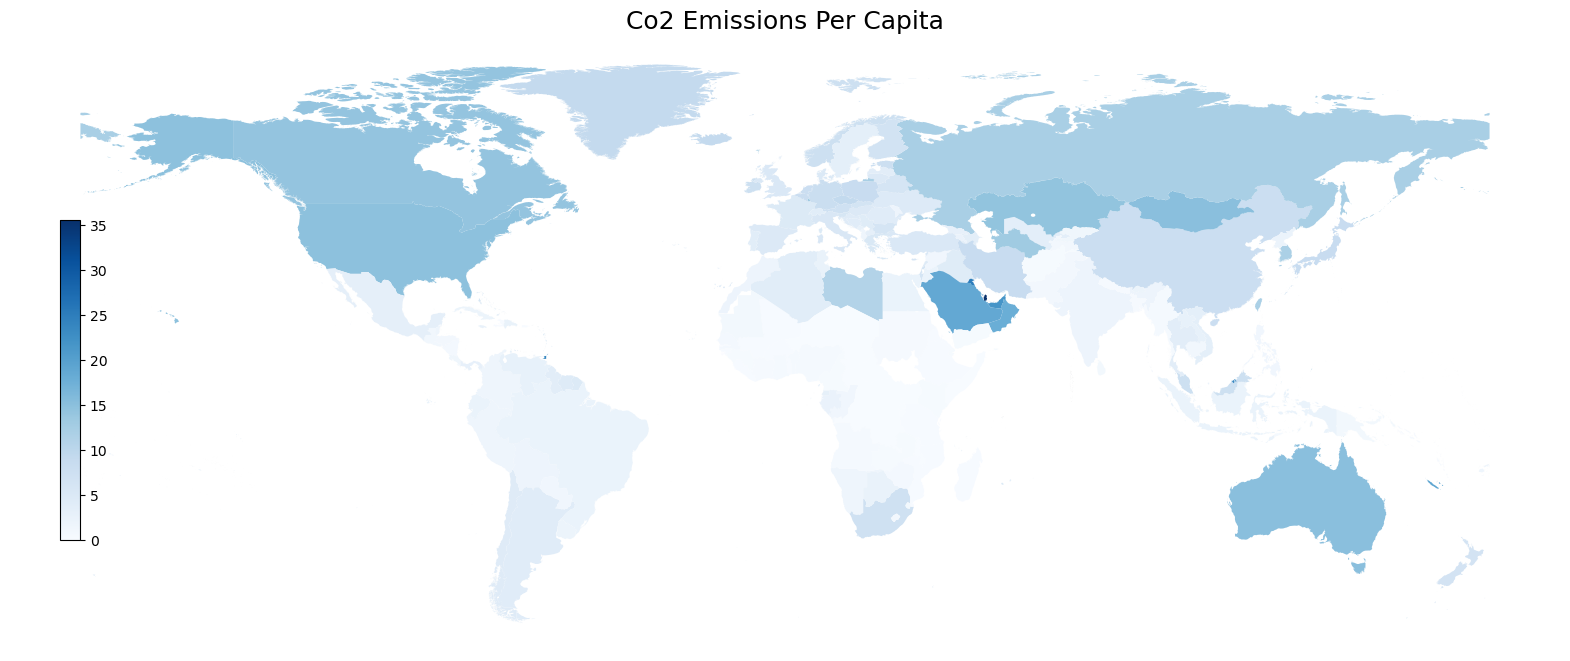

In [7]:
title="Co2 Emissions Per Capita"
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.set_title(title, fontdict={'fontsize': '18', 'fontweight': '3'})
vmin = Co21["Per Capita"].min()
vmax = Co21["Per Capita"].max()
Co21.plot(column="Per Capita", cmap="Blues", linewidth=0.4, ax=ax)
ax.axis("off")
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap="Blues")
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.show()

c:\Users\crisi\anaconda3\envs\Env1\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


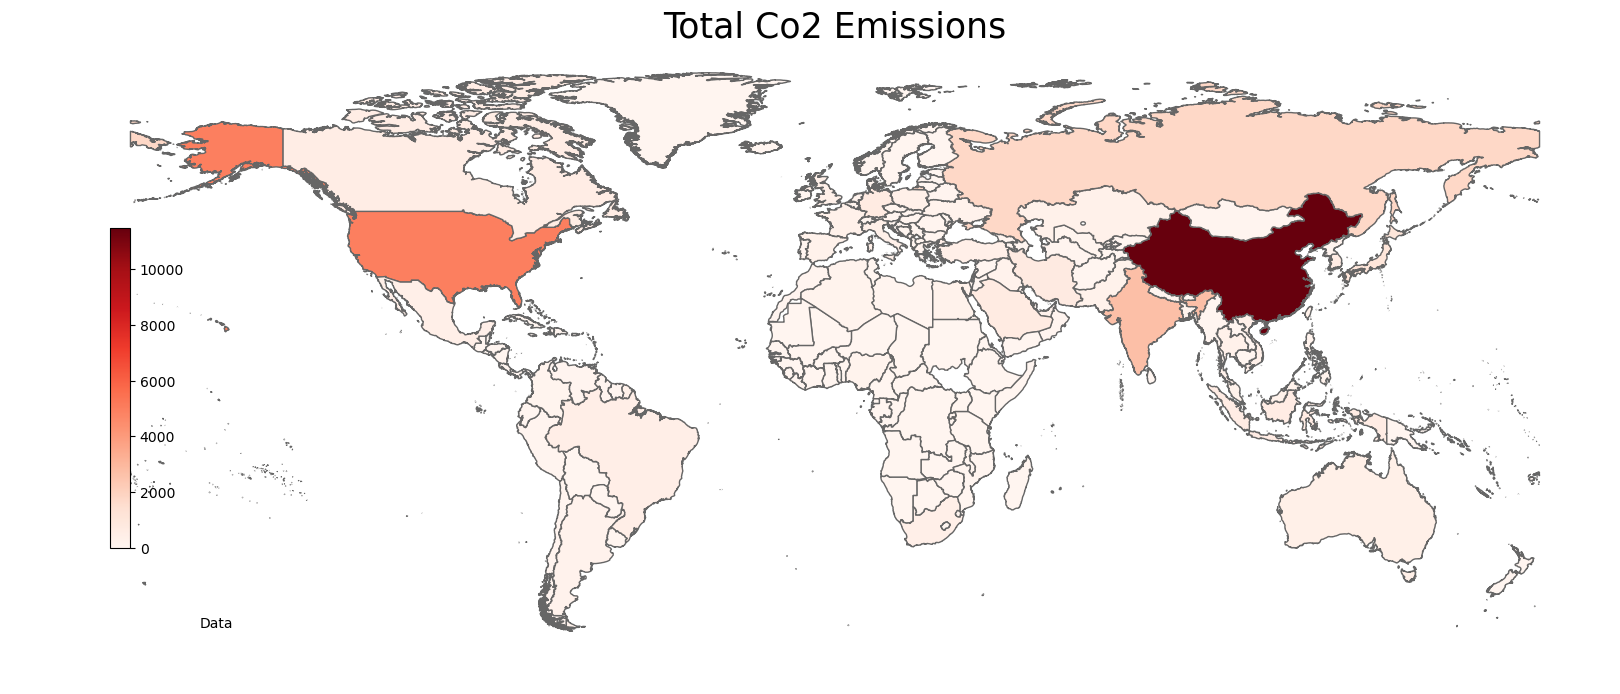

In [8]:
title="Total Co2 Emissions"
col="Total"
source="Data"
vmin = Co21[col].min()
vmax = Co21[col].max()
#cmap = 'viridis'
cmap = 'Reds'
fig, ax= plt.subplots(1, figsize=(20,8))
ax.axis("off")
Co21.plot(column="Total", ax=ax, linewidth=1, cmap=cmap, edgecolor='0.4')
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.show()

